# Modelling Mass Migration

Let's think about this in the simplest possible way to begin with. Once the basics are in place, we can add in some complexities. 

The structure of the world is as follows. 

1. There is a grid of discrete points, one of which is occupied by an initial population. 
2. A Malthusian population dynamic is in place at the initial region. 
3. With a small probability $b$, a "bonanza" - a system-wide positive shock - occurs.

So, in the initial location, imagine that production per person per person is :

$$
q_t = \frac{A}{p_t}
$$

All production is devoted to creation of children, so the population next period is:

$$
p_{t+1} = p_tq_t = A
$$

This reflects the idea that population tends to its natural carrying capacity, so steady-state population is $p=A$. People cannot survive on their own, so if they wish to move to a new location, they need to do so en masse. Suppose a move to a new area requires a minimum of  $\overline{m}$ people. 

Consider the steady-state population, and note that agents will consider moving en masse out of the initial area only if:

$$
\frac{A}{\overline{m}} \geq \frac{A}{\overline{p}-m} \quad \rightarrow m \leq \frac{A}{2}
$$

Let's suppose that this inequality **does not hold**. This means that more than half of the steady-state population would have to leave for a mass migration to be successful. Hence, in an initial equilibrium, the population will simply stay put in its initial location. 

Now, with a (very small) probability $b$, a "Bonanza" event occurs. The resource level increases to $B>A$. Now, consider the initial location. The population is initially at $p=A$, but following the Bonanza we have:. 

$$
p_{t+1} = q_tp_t = \frac{B}{A}A=B
$$

In the subsequent period, $B$ stays as-is, or with probability $r$ goes to zero. Suppose that the latter event actually materializes. Individual utility is:

$$
u_t = \frac{A}{B}
$$

And now, individuals might consider a mass migration. In fact, the equilibrium migration will equate utilities across the two locations, and hence:
$$
u'_t = \frac{B}{m_t} = \frac{A}{B-m_t}=u_t
$$
which gives:
$$
m^* = \frac{B^2}{A+B}
$$

Upon migration to the new area. Since utility is now the same in both places, $u=\frac{A+B}{B}$, population in each location is:

$$
p'_t = m_t = \frac{B^2}{A+B}, \quad p_t = \frac{AB}{A+B}
$$.  

In the next period, we have:

$$
p'_{t+1} = B, \quad p_{t+1}=A
$$

# Key Points

1. The "collapse" of the Bonanza leads to a mass migration, which adopts the population to its initial level.
2. The new location now has an eminent probability of collapse in the subsequent period. 


# Extending the migration

Let's suppose we know that a single Bonanza event has occurred at time $0$. we then observe subsequent to this a migration from location $a$ to $b$ $ after $t$ units of time, and a migration from $b$ to $c$ after an additional $u$ units of time. 

To render things into a maximum likelihood version of the model, we first do the following, standard derivation:

$$

$$

In [24]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

Let's first make a simple model of overshooting. Here, we start with population going as follows:

In [45]:
Pop1 = np.zeros(50)
Pop2 = np.zeros(50)
Q1   = np.zeros(50)
Q2   = np.zeros(50)

b    = 1.2
pbar = 50

Pop1[0] = 1
Pop2[0] = 1
Q1[0]   = b
Q2[0]   = b

def qt(p, pbar, b):
    return b*np.min( (pbar / p ,1))

first_time = 0
for t in np.arange(1, len(Pop1)):
    Q1[t-1] = qt(Pop1[t-1], pbar, b)
    Q2[t-1] = qt(Pop2[t-1], pbar, b)
    Pop1[t] = Q1[t-1]*Pop1[t-1]
    Pop2[t] = Q2[t-1]*Pop2[t-1]
    
    if first_time == 0 and Pop2[t] > pbar:
        Pop2[t] = pbar
        first_time = 1
        print('here')
    
    

here


In [46]:
Pop2

array([  1.        ,   1.2       ,   1.44      ,   1.728     ,
         2.0736    ,   2.48832   ,   2.985984  ,   3.5831808 ,
         4.29981696,   5.15978035,   6.19173642,   7.43008371,
         8.91610045,  10.69932054,  12.83918465,  15.40702157,
        18.48842589,  22.18611107,  26.62333328,  31.94799994,
        38.33759992,  46.00511991,  50.        ,  60.        ,
        60.        ,  60.        ,  60.        ,  60.        ,
        60.        ,  60.        ,  60.        ,  60.        ,
        60.        ,  60.        ,  60.        ,  60.        ,
        60.        ,  60.        ,  60.        ,  60.        ,
        60.        ,  60.        ,  60.        ,  60.        ,
        60.        ,  60.        ,  60.        ,  60.        ,
        60.        ,  60.        ])

A simple plot of the above goes as follows;


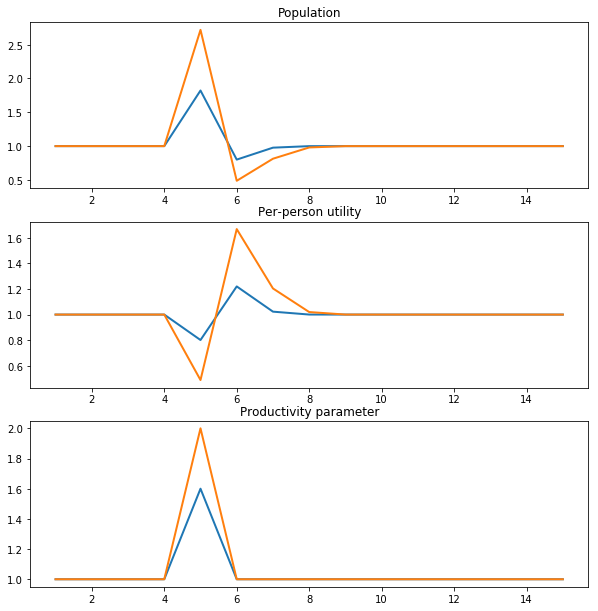

In [28]:
plt.figure(1)
plt.subplot(311)
plt.plot(time, Pop1, lw=2)
plt.plot(time, Pop2, lw=2)
plt.title('Population')

plt.subplot(312)
plt.plot(time, u1, lw=2)
plt.plot(time, u2, lw=2)
plt.title('Per-person utility')

plt.subplot(313)
plt.plot(time, At1, lw=2)
plt.plot(time, At2, lw=2)
plt.title('Productivity parameter')

plt.subplots_adjust(bottom=-.1)

## Bonanza events

Picture the world as a grid of discrete locations or islands. Each island has some base resource level which we normalize to one. Thus, the steady-state population 

Let's now suppose that instead of the above, people have a chance to migrate. All locations are the same in the initial report. But if I certain segment of the population migrates, They can earn Utility:

$$
u = e^{A+B-m_{t+1} - \kappa} 
$$

The new terms are a moving cost $\kappa$ and a moving Bonanza, $B$. How does this bonanza work? Well, we imagine it exists for each period that the new people are there, but disappears probabilistically once a new location has been occupied. 

According to this model, people will only migrate if:

$$
u_m>u_s \quad \rightarrow \quad e^{A-p} \leq e^{A+B-k}
$$

we therefore will assume that $k>B$. The costs of a move are greater than the expected bounty obtained 